In [24]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 8.0)
import statsmodels.api as sm
import statsmodels.tsa as tsa
%matplotlib inline

In [25]:
df = pd.read_excel('Dados de consumo.xlsx',parse_dates=['Data e Hora'])

In [26]:
df.head()

,Data e Hora,Consumo(litros),Valor Acumulado
0,2017-08-21 20:00:00,65,65
1,2017-08-21 21:00:00,81,146
2,2017-08-21 22:00:00,10,156
3,2017-08-21 23:00:00,12,168
4,2017-08-22 00:00:00,14,182


In [27]:
df['Data e Hora'] = pd.to_datetime(df['Data e Hora'])
df['Data'] = df['Data e Hora'].dt.strftime('%Y-%m-%d')
df['Hora'] = df['Data e Hora'].dt.strftime('%H:%M:%S')
df['Semana'] = df['Data e Hora'].dt.strftime('%A')

In [28]:
df.head()

,Data e Hora,Consumo(litros),Valor Acumulado,Data,Hora,Semana
0,2017-08-21 20:00:00,65,65,2017-08-21,20:00:00,Monday
1,2017-08-21 21:00:00,81,146,2017-08-21,21:00:00,Monday
2,2017-08-21 22:00:00,10,156,2017-08-21,22:00:00,Monday
3,2017-08-21 23:00:00,12,168,2017-08-21,23:00:00,Monday
4,2017-08-22 00:00:00,14,182,2017-08-22,00:00:00,Tuesday


In [29]:
del df['Data e Hora']

In [30]:
df.head()

,Consumo(litros),Valor Acumulado,Data,Hora,Semana
0,65,65,2017-08-21,20:00:00,Monday
1,81,146,2017-08-21,21:00:00,Monday
2,10,156,2017-08-21,22:00:00,Monday
3,12,168,2017-08-21,23:00:00,Monday
4,14,182,2017-08-22,00:00:00,Tuesday


In [31]:
df=df[['Data','Hora','Semana','Consumo(litros)','Valor Acumulado']]

In [32]:
df.head()

,Data,Hora,Semana,Consumo(litros),Valor Acumulado
0,2017-08-21,20:00:00,Monday,65,65
1,2017-08-21,21:00:00,Monday,81,146
2,2017-08-21,22:00:00,Monday,10,156
3,2017-08-21,23:00:00,Monday,12,168
4,2017-08-22,00:00:00,Tuesday,14,182


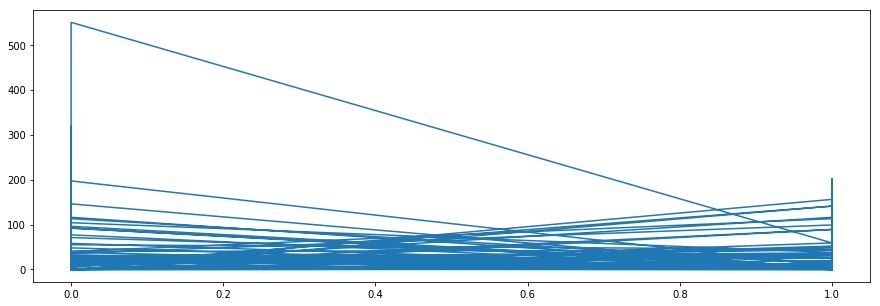

In [33]:
plt.figure(figsize=(15,5))
plt.plot(df['Semana']=='Monday', df['Consumo(litros)'])

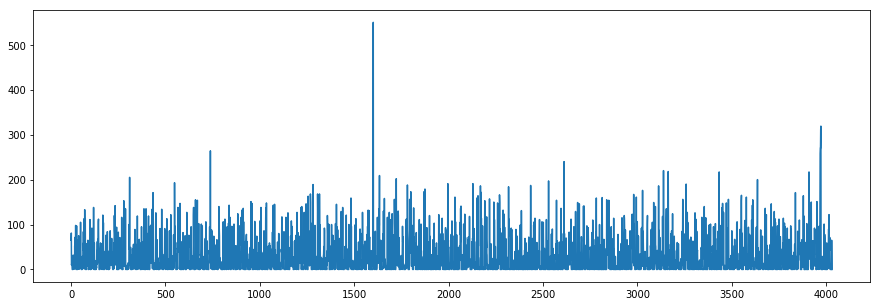

In [34]:
plt.figure(figsize=(15,5))
plt.plot( df['Consumo(litros)'])

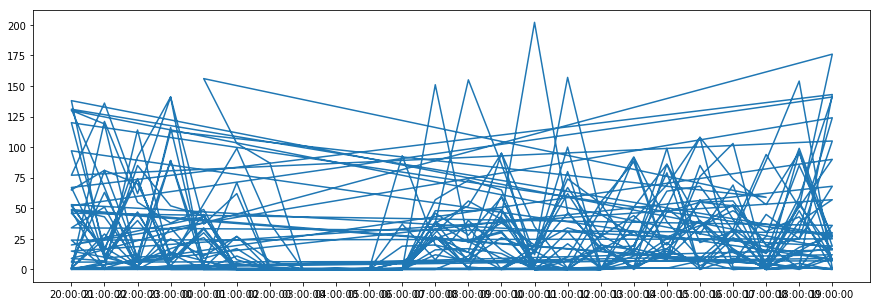

In [35]:
plt.figure(figsize=(15,5))
plt.plot(df['Hora'][df['Semana']=='Monday'], df['Consumo(litros)'][df['Semana']=='Monday'])


In [36]:
#df['LotArea'][df['LotArea']>5000].count()
df['Data'][df['Semana']=='Monday']

0       2017-08-21
1       2017-08-21
2       2017-08-21
3       2017-08-21
147     2017-08-28
148     2017-08-28
149     2017-08-28
150     2017-08-28
151     2017-08-28
152     2017-08-28
153     2017-08-28
154     2017-08-28
155     2017-08-28
156     2017-08-28
157     2017-08-28
158     2017-08-28
159     2017-08-28
160     2017-08-28
161     2017-08-28
162     2017-08-28
163     2017-08-28
164     2017-08-28
165     2017-08-28
166     2017-08-28
167     2017-08-28
168     2017-08-28
169     2017-08-28
170     2017-08-28
315     2017-09-04
316     2017-09-04
           ...    
3810    2018-04-23
3811    2018-04-23
3812    2018-04-23
3813    2018-04-23
3814    2018-04-23
3815    2018-04-23
3816    2018-04-23
3945    2018-04-30
3946    2018-04-30
3947    2018-04-30
3948    2018-04-30
3949    2018-04-30
3950    2018-04-30
3951    2018-04-30
3952    2018-04-30
3953    2018-04-30
3954    2018-04-30
3955    2018-04-30
3956    2018-04-30
3957    2018-04-30
3958    2018-04-30
3959    2018

In [37]:
df['Data'][df['Semana']=='Tuesday']

4       2017-08-22
5       2017-08-22
6       2017-08-22
7       2017-08-22
8       2017-08-22
9       2017-08-22
10      2017-08-22
11      2017-08-22
12      2017-08-22
13      2017-08-22
14      2017-08-22
15      2017-08-22
16      2017-08-22
17      2017-08-22
18      2017-08-22
19      2017-08-22
20      2017-08-22
21      2017-08-22
22      2017-08-22
23      2017-08-22
24      2017-08-22
25      2017-08-22
26      2017-08-22
27      2017-08-22
171     2017-08-29
172     2017-08-29
173     2017-08-29
174     2017-08-29
175     2017-08-29
176     2017-08-29
           ...    
3688    2018-04-17
3817    2018-04-24
3818    2018-04-24
3819    2018-04-24
3820    2018-04-24
3821    2018-04-24
3822    2018-04-24
3823    2018-04-24
3824    2018-04-24
3825    2018-04-24
3826    2018-04-24
3827    2018-04-24
3828    2018-04-24
3829    2018-04-24
3830    2018-04-24
3831    2018-04-24
3832    2018-04-24
3833    2018-04-24
3834    2018-04-24
3835    2018-04-24
3836    2018-04-24
3837    2018

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

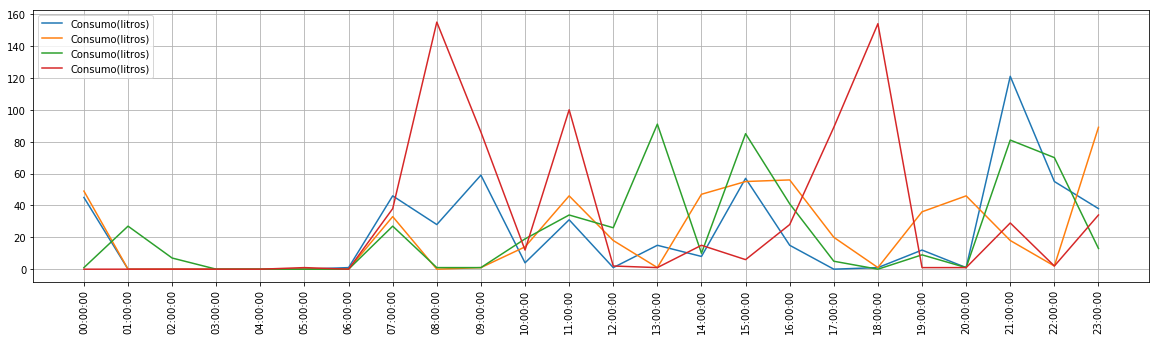

In [38]:
plt.figure(figsize=(20,5))
#plt.plot(df['Hora'][df['Data']=='2017-08-21'], df['Consumo(litros)'][df['Data']=='2017-08-21'])
plt.plot(df['Hora'][df['Data']=='2017-08-28'], df['Consumo(litros)'][df['Data']=='2017-08-28'])
plt.plot(df['Hora'][df['Data']=='2017-09-04'], df['Consumo(litros)'][df['Data']=='2017-09-04'])
plt.plot(df['Hora'][df['Data']=='2017-09-11'], df['Consumo(litros)'][df['Data']=='2017-09-11'])
plt.plot(df['Hora'][df['Data']=='2017-09-18'], df['Consumo(litros)'][df['Data']=='2017-09-18'])
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(  rotation='vertical')


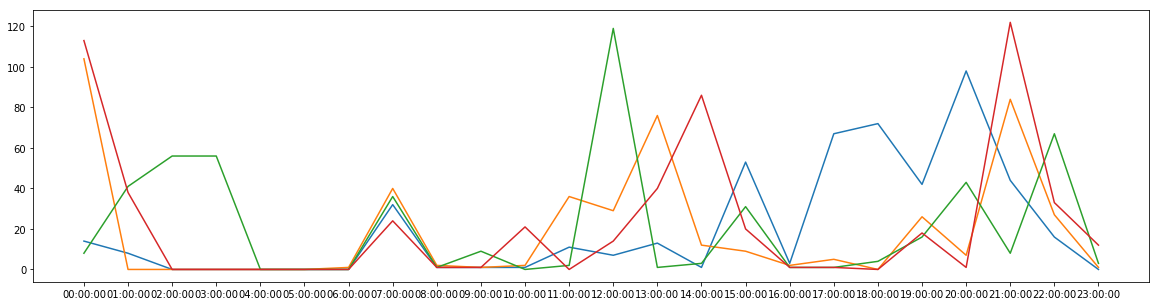

In [39]:
plt.figure(figsize=(20,5))
plt.plot(df['Hora'][df['Data']=='2017-08-22'], df['Consumo(litros)'][df['Data']=='2017-08-22'])
plt.plot(df['Hora'][df['Data']=='2017-08-29'], df['Consumo(litros)'][df['Data']=='2017-08-29'])
plt.plot(df['Hora'][df['Data']=='2017-09-05'], df['Consumo(litros)'][df['Data']=='2017-09-05'])
plt.plot(df['Hora'][df['Data']=='2017-09-12'], df['Consumo(litros)'][df['Data']=='2017-09-12'])

plt.figure(figsize=(20,5))
for i in df['Data']:
    for e in df['Semana']:
        if e == 'Monday':
            plt.plot(df['Hora'][df['Data']==i], df['Consumo(litros)'][df['Data']==i])

In [70]:
v1= df['Consumo(litros)'][df['Data']=='2017-08-22']
v2=df['Consumo(litros)'][df['Data']=='2017-08-29']
def dist_euclidiana_np(v1, v2):
    # v1= np.array(v1)
    # v2 = np.array(v2)
	#variavel v1 recebe vetor v1
    v1, v2 = np.array(v1), np.array(v2)
	#diferenca entre os elementos 
    dif = v1 - v2
	#multiplicaçao entre os elementos
    quad_dist = np.dot(dif, dif)
    return math.sqrt(quad_dist)


print('Distancia Numpy %.2f' % dist_euclidiana_np(v1, v2))
print('Distancia Numpy {:.2f}' .format(dist_euclidiana_np(v1, v2)))


Distancia Numpy 186.16
Distancia Numpy 186.16


In [18]:
v1= df['Consumo(litros)'][df['Data']=='2017-08-29']
v2=df['Consumo(litros)'][df['Data']=='2017-09-05']
def dist_euclidiana_np(v1, v2):
    # v1= np.array(v1)
    # v2 = np.array(v2)
	#variavel v1 recebe vetor v1
    v1, v2 = np.array(v1), np.array(v2)
	#diferenca entre os elementos 
    dif = v1 - v2
	#multiplicaçao entre os elementos
    quad_dist = np.dot(dif, dif)
    return math.sqrt(quad_dist)


print('Distancia Numpy %.2f' % dist_euclidiana_np(v1, v2))

Distancia Numpy 203.74


In [107]:
v1= df['Consumo(litros)'][df['Data']=='2017-08-29']
v2=df['Consumo(litros)'][df['Data']=='2017-09-05']
from scipy.spatial import distance
#a = (1, 2, 3)
#b = (4, 5, 6)
dst = distance.euclidean(v1,v2)
print('Distancia Euclidiana {:.2f}'.format(dst))

Distancia Euclidiana 203.74


In [108]:
v1= df['Consumo(litros)'][df['Data']=='2017-08-29']
print(f'distanci euclidiana\n{v1}')

distanci euclidiana
171    104
172      0
173      0
174      0
175      0
176      0
177      1
178     40
179      2
180      1
181      2
182     36
183     29
184     76
185     12
186      9
187      2
188      5
189      0
190     26
191      7
192     84
193     27
194      1
Name: Consumo(litros), dtype: int64


In [110]:
df['Consumo(litros)'][[df['Data'][df['Semana']=='Monday']]]

KeyError: 'None of [[0       2017-08-21\n1       2017-08-21\n2       2017-08-21\n3       2017-08-21\n147     2017-08-28\n148     2017-08-28\n149     2017-08-28\n150     2017-08-28\n151     2017-08-28\n152     2017-08-28\n153     2017-08-28\n154     2017-08-28\n155     2017-08-28\n156     2017-08-28\n157     2017-08-28\n158     2017-08-28\n159     2017-08-28\n160     2017-08-28\n161     2017-08-28\n162     2017-08-28\n163     2017-08-28\n164     2017-08-28\n165     2017-08-28\n166     2017-08-28\n167     2017-08-28\n168     2017-08-28\n169     2017-08-28\n170     2017-08-28\n315     2017-09-04\n316     2017-09-04\n           ...    \n3810    2018-04-23\n3811    2018-04-23\n3812    2018-04-23\n3813    2018-04-23\n3814    2018-04-23\n3815    2018-04-23\n3816    2018-04-23\n3945    2018-04-30\n3946    2018-04-30\n3947    2018-04-30\n3948    2018-04-30\n3949    2018-04-30\n3950    2018-04-30\n3951    2018-04-30\n3952    2018-04-30\n3953    2018-04-30\n3954    2018-04-30\n3955    2018-04-30\n3956    2018-04-30\n3957    2018-04-30\n3958    2018-04-30\n3959    2018-04-30\n3960    2018-04-30\n3961    2018-04-30\n3962    2018-04-30\n3963    2018-04-30\n3964    2018-04-30\n3965    2018-04-30\n3966    2018-04-30\n3967    2018-04-30\nName: Data, Length: 569, dtype: object]] are in the [index]'

In [89]:
df['Data'][df['Semana']=='Monday']

0       2017-08-21
1       2017-08-21
2       2017-08-21
3       2017-08-21
147     2017-08-28
148     2017-08-28
149     2017-08-28
150     2017-08-28
151     2017-08-28
152     2017-08-28
153     2017-08-28
154     2017-08-28
155     2017-08-28
156     2017-08-28
157     2017-08-28
158     2017-08-28
159     2017-08-28
160     2017-08-28
161     2017-08-28
162     2017-08-28
163     2017-08-28
164     2017-08-28
165     2017-08-28
166     2017-08-28
167     2017-08-28
168     2017-08-28
169     2017-08-28
170     2017-08-28
315     2017-09-04
316     2017-09-04
           ...    
3810    2018-04-23
3811    2018-04-23
3812    2018-04-23
3813    2018-04-23
3814    2018-04-23
3815    2018-04-23
3816    2018-04-23
3945    2018-04-30
3946    2018-04-30
3947    2018-04-30
3948    2018-04-30
3949    2018-04-30
3950    2018-04-30
3951    2018-04-30
3952    2018-04-30
3953    2018-04-30
3954    2018-04-30
3955    2018-04-30
3956    2018-04-30
3957    2018-04-30
3958    2018-04-30
3959    2018

In [111]:
df['Consumo(litros)'][df['Semana']=='Monday']==df['Data'][df['Semana']=='Monday']

0       False
1       False
2       False
3       False
147     False
148     False
149     False
150     False
151     False
152     False
153     False
154     False
155     False
156     False
157     False
158     False
159     False
160     False
161     False
162     False
163     False
164     False
165     False
166     False
167     False
168     False
169     False
170     False
315     False
316     False
        ...  
3810    False
3811    False
3812    False
3813    False
3814    False
3815    False
3816    False
3945    False
3946    False
3947    False
3948    False
3949    False
3950    False
3951    False
3952    False
3953    False
3954    False
3955    False
3956    False
3957    False
3958    False
3959    False
3960    False
3961    False
3962    False
3963    False
3964    False
3965    False
3966    False
3967    False
Length: 569, dtype: bool

In [112]:
df['Data'][df['Semana']=='Monday']==df['Data'][df['Semana']=='Monday']

0       True
1       True
2       True
3       True
147     True
148     True
149     True
150     True
151     True
152     True
153     True
154     True
155     True
156     True
157     True
158     True
159     True
160     True
161     True
162     True
163     True
164     True
165     True
166     True
167     True
168     True
169     True
170     True
315     True
316     True
        ... 
3810    True
3811    True
3812    True
3813    True
3814    True
3815    True
3816    True
3945    True
3946    True
3947    True
3948    True
3949    True
3950    True
3951    True
3952    True
3953    True
3954    True
3955    True
3956    True
3957    True
3958    True
3959    True
3960    True
3961    True
3962    True
3963    True
3964    True
3965    True
3966    True
3967    True
Name: Data, Length: 569, dtype: bool